In [1]:
%matplotlib inline
import tangos
import tangos.examples.mergers as mergers

import numpy as np
import h5py
import matplotlib.pyplot as plt
h = 0.6776942783267969
from tangos_halo_module.halo_properties import first_encounter_time, max_mass_time, disruption_time, accretion_time
from tangos_halo_module.path import get_file_path

In [2]:
#h148
tangos.init_db("simulation_database/h148.db")
h148 = tangos.get_halo("snapshots/h148.cosmo50PLK.3072g3HbwK1BH.004096/halo_1")
# Survivors
h148_survivors = []
for sats in h148['childHalo']:
    if sats.NStar > 0: #no dm-only halos
        h148_survivors.append(sats)
h148_survivors = list(set(h148_survivors)) #unique halos
# Zombies
redshift, ratio, progenitor_halos = mergers.get_mergers_of_major_progenitor(h148)
h148_zombies = [x[1] for x in progenitor_halos] 
h148_zombies = list(set(h148_zombies)) #unique halos
for sat in h148_zombies:
    path = get_file_path(tangos_halo=sat, simulation='h148', status='Zombie')
    with h5py.File(path, 'r') as f:
        satMstar = f['M_star_|_Msol'][:]
    if satMstar[-1]==0:
        h148_zombies.remove(sat) #remove halos with no stars ever

#h229
tangos.init_db("simulation_database/h229.db")
h229 = tangos.get_halo("snapshots/h229.cosmo50PLK.3072gst5HbwK1BH.004096/halo_1")
# Survivors
h229_survivors = []
for sats in h229['childHalo']:
    if sats.NStar > 0:
        h229_survivors.append(sats)
h229_survivors = list(set(h229_survivors))
# Zombies
redshift, ratio, progenitor_halos = mergers.get_mergers_of_major_progenitor(h229)
h229_zombies = [x[1] for x in progenitor_halos] 
h229_zombies = list(set(h229_zombies))
for sat in h229_zombies:
    path = get_file_path(tangos_halo=sat, simulation='h229', status='Zombie')
    with h5py.File(path, 'r') as f:
        satMstar = f['M_star_|_Msol'][:]
    if satMstar[-1]==0:
        h229_zombies.remove(sat)

#h242
tangos.init_db("simulation_database/h242.db")
h242 = tangos.get_halo("snapshots/h242.cosmo50PLK.3072gst5HbwK1BH.004096/halo_1")
# Survivors
h242_survivors = []
for sats in h242['childHalo']:
    if sats.NStar > 0:
        h242_survivors.append(sats)
h242_survivors = list(set(h242_survivors))
# Zombies
redshift, ratio, progenitor_halos = mergers.get_mergers_of_major_progenitor(h242)
h242_zombies = [x[1] for x in progenitor_halos] 
h242_zombies = list(set(h242_zombies))
for sat in h242_zombies:
    path = get_file_path(tangos_halo=sat, simulation='h242', status='Zombie')
    with h5py.File(path, 'r') as f:
        satMstar = f['M_star_|_Msol'][:]
    if satMstar[-1]==0:
        h242_zombies.remove(sat)

#h329
tangos.init_db("simulation_database/h329.db")
h329 = tangos.get_halo("snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.004096/halo_1")
# Survivors
h329_survivors = []
for sats in h329['childHalo']:
    if sats.NStar > 0:
        h329_survivors.append(sats)
h329_survivors = list(set(h329_survivors))
# Zombies
redshift, ratio, progenitor_halos = mergers.get_mergers_of_major_progenitor(h329)
h329_zombies = [x[1] for x in progenitor_halos] 
h329_zombies = list(set(h329_zombies))
for sat in h329_zombies:
    path = get_file_path(tangos_halo=sat, simulation='h329', status='Zombie')
    with h5py.File(path, 'r') as f:
        satMstar = f['M_star_|_Msol'][:]
    if satMstar[-1]==0:
        h329_zombies.remove(sat)

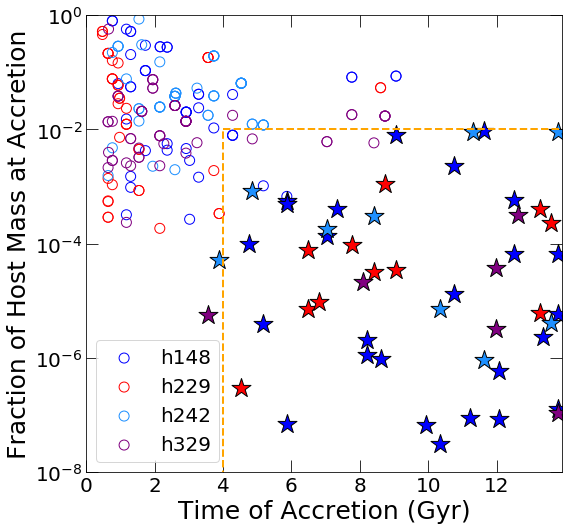

In [8]:
fig, ax1 = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(8, 7.5))
fig.set_facecolor('w')
np.seterr(divide='ignore')

linx=np.linspace(1e-10, 14, 100)
cm = plt.cm.get_cmap('inferno')

x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h148_zombies:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax1.scatter(x, y, s=100, alpha=1, edgecolor='blue', facecolor='none', label='h148')
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h148_survivors:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax1.scatter(x, y, s=400, c='blue', alpha=1, edgecolor='k', marker='*')



x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h229_zombies:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax1.scatter(x, y, s=100, alpha=1, edgecolor='red', facecolor='none', label='h229')

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h229_survivors:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax1.scatter(x, y, s=400, c='red', alpha=1, edgecolor='k', marker='*')



x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h242_zombies:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax1.scatter(x, y, s=100, alpha=1, edgecolor='dodgerblue', facecolor='none', label='h242')

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h242_survivors:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax1.scatter(x, y, s=400, c='dodgerblue', alpha=1, edgecolor='k', marker='*')


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h329_zombies:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax1.scatter(x, y, s=100, alpha=1, edgecolor='purple', facecolor='none', label='h329')

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h329_survivors:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax1.scatter(x, y, s=400, c='purple', alpha=1, edgecolor='k', marker='*')

ax1.legend(loc='best', fontsize=20, frameon=True)
ax1.plot(np.linspace(4, 14, 100), [1e-2]*100, ls='--', c='orange', lw=2)
ax1.plot([4]*100, np.linspace(1e-10, 1e-2, 100),  ls='--', c='orange', lw=2)
ax1.set_yscale('log')
ax1.set_ylim(1e-8, 1e0)
ax1.set_xlim(0, 13.9)
ax1.set_ylabel('Fraction of Host Mass at Accretion', fontsize=25)
ax1.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax1.tick_params(which='major', length=12)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


fig.tight_layout()

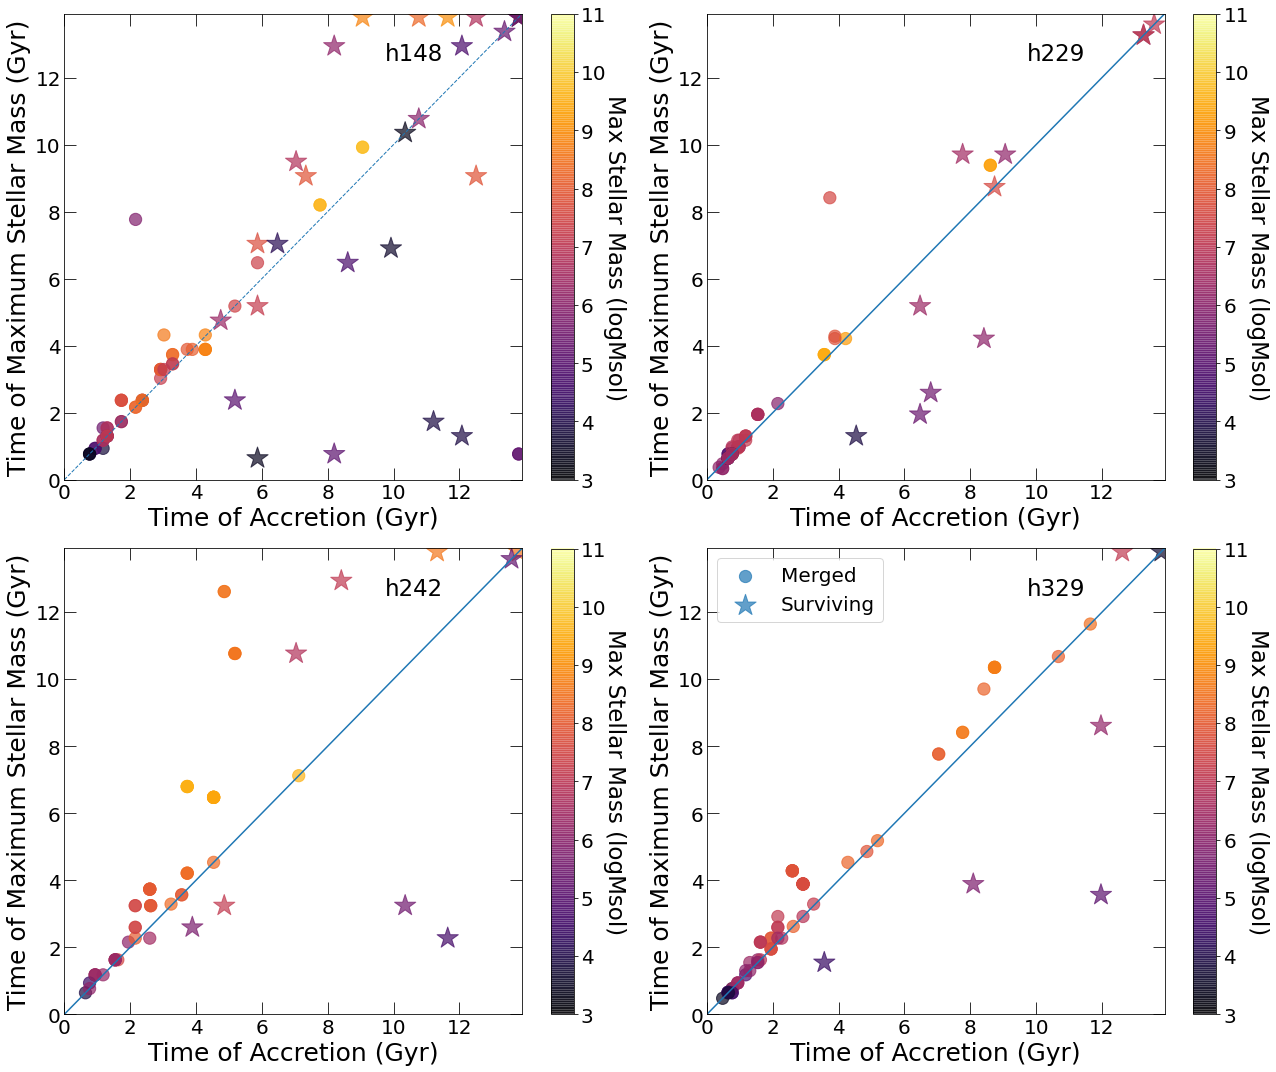

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='none', sharey='none', figsize=(18, 15))
fig.set_facecolor('w')
np.seterr(divide='ignore')

linx=np.linspace(0, 14, 20)
cm = plt.cm.get_cmap('inferno')

x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h148_zombies:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    z = np.concatenate((z, max_Mstar_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax1.scatter(x, y, s=150, c=np.log10(z), alpha=0.7, label='Merged', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax1)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h148_survivors:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    z = np.concatenate((z, max_Mstar_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax1.scatter(x, y, s=500, c=np.log10(z), alpha=0.7, label='Surviving', marker='*', vmin=3, vmax=11, cmap=cm)
#ax1.legend(loc='best', fontsize=20, frameon=True)
ax1.plot(linx, linx, ls='--', lw=1)
ax1.text(0.7, 0.9, 'h148', transform=ax1.transAxes, fontsize=23)
ax1.set_ylim(0, 13.9)
ax1.set_xlim(0, 13.9)
ax1.set_ylabel('Time of Maximum Stellar Mass (Gyr)', fontsize=25)
ax1.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax1.tick_params(which='major', length=12)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h229_zombies:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    z = np.concatenate((z, max_Mstar_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax2.scatter(x, y, s=150, c=np.log10(z), alpha=0.7, label='Merged', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax2)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h229_survivors:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    z = np.concatenate((z, max_Mstar_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax2.scatter(x, y, s=500, c=np.log10(z), alpha=0.7, label='Surviving', marker='*', vmin=3, vmax=11, cmap=cm)
#ax2.legend(loc='best', fontsize=20, frameon=True)
ax2.plot(linx, linx)
ax2.text(0.7, 0.9, 'h229', transform=ax2.transAxes, fontsize=23)
ax2.set_ylim(0, 13.9)
ax2.set_xlim(0, 13.9)
ax2.set_ylabel('Time of Maximum Stellar Mass (Gyr)', fontsize=25)
ax2.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax2.tick_params(which='major', length=12)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h242_zombies:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    z = np.concatenate((z, max_Mstar_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax3.scatter(x, y, s=150, c=np.log10(z), alpha=0.7, label='Merged', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax3)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h242_survivors:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    z = np.concatenate((z, max_Mstar_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax3.scatter(x, y, s=500, c=np.log10(z), alpha=0.7, label='Surviving', marker='*', vmin=3, vmax=11, cmap=cm)
#ax3.legend(loc='best', fontsize=20, frameon=True)
ax3.plot(linx, linx)
ax3.text(0.7, 0.9, 'h242', transform=ax3.transAxes, fontsize=23)
ax3.set_ylim(0, 13.9)
ax3.set_xlim(0, 13.9)
ax3.set_ylabel('Time of Maximum Stellar Mass (Gyr)', fontsize=25)
ax3.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax3.tick_params(which='major', length=12)
ax3.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h329_zombies:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    z = np.concatenate((z, max_Mstar_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax4.scatter(x, y, s=150, c=np.log10(z), alpha=0.7, label='Merged', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax4)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h329_survivors:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    z = np.concatenate((z, max_Mstar_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax4.scatter(x, y, s=500, c=np.log10(z), alpha=0.7, label='Surviving', marker='*', vmin=3, vmax=11, cmap=cm)
ax4.legend(loc='best', fontsize=20, frameon=True)
ax4.plot(linx, linx)
ax4.text(0.7, 0.9, 'h329', transform=ax4.transAxes, fontsize=23)
ax4.set_ylim(0, 13.9)
ax4.set_xlim(0, 13.9)
ax4.set_ylabel('Time of Maximum Stellar Mass (Gyr)', fontsize=25)
ax4.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax4.tick_params(which='major', length=12)
ax4.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


fig.tight_layout()

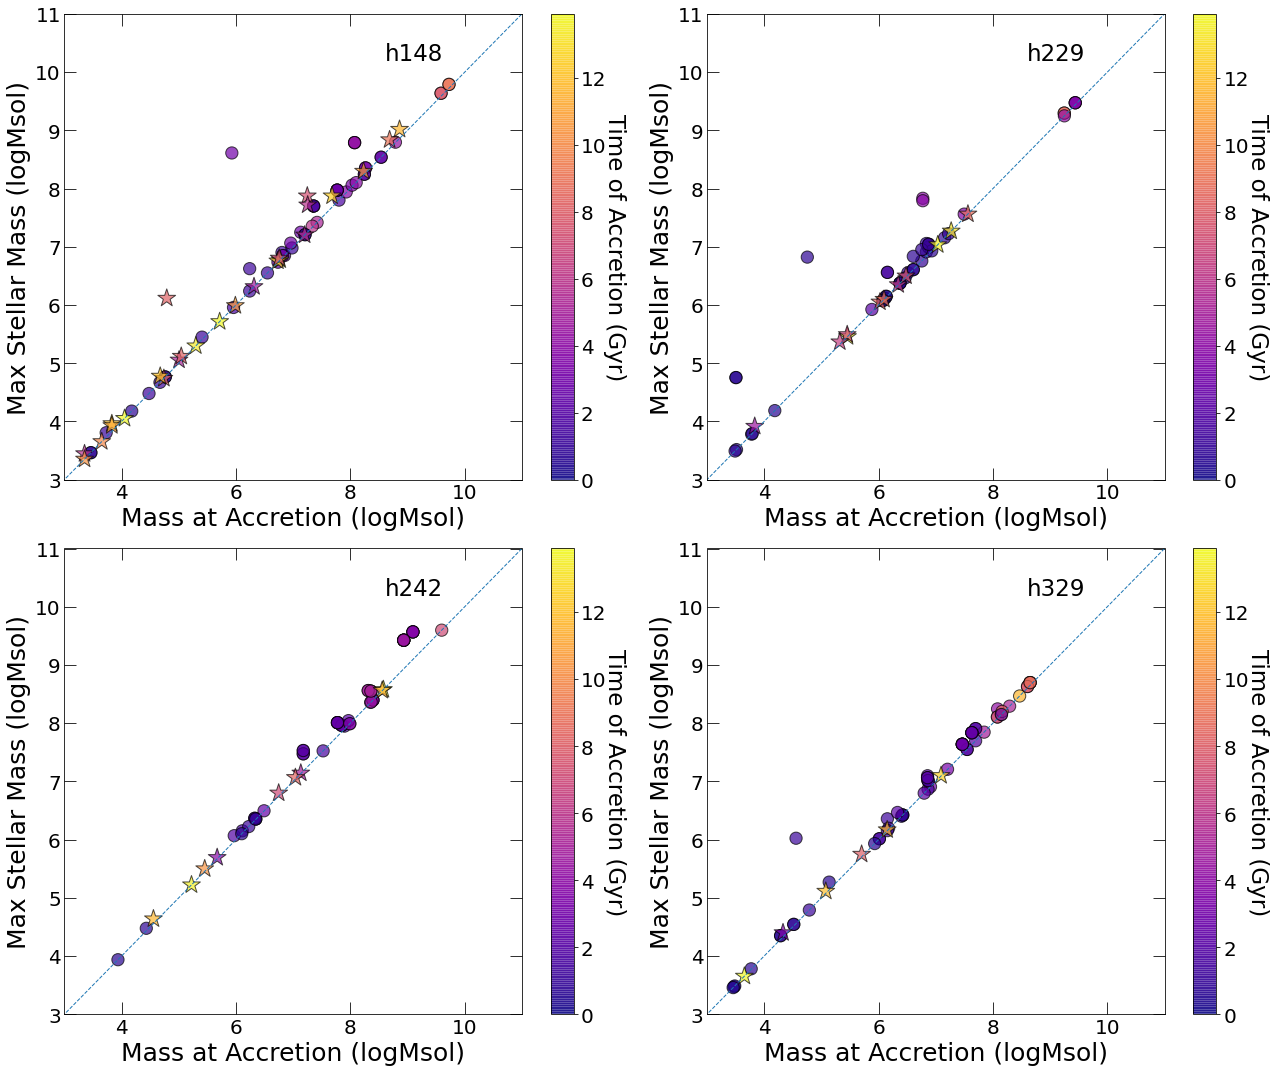

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='none', sharey='none', figsize=(18, 15))
fig.set_facecolor('w')
np.seterr(divide='ignore')

linx=np.linspace(0, 14, 20)
cm = plt.cm.get_cmap('plasma')

#Zombies
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h148_zombies:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
i1 = ax1.scatter(np.log10(x), np.log10(y), s=150, c=z, alpha=0.7, edgecolor='k', label='Merged', vmin=0, vmax=13.9, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax1)
cbar1.set_label('Time of Accretion (Gyr)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h148_survivors:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
i11 = ax1.scatter(np.log10(x), np.log10(y), s=350, c=z, alpha=0.7, edgecolor='k', label='Surviving', marker='*', vmin=0, vmax=13.9, cmap=cm)
#ax1.legend(loc='best', fontsize=20, frameon=True)
ax1.plot(linx, linx, ls='--', lw=1)
ax1.text(0.7, 0.9, 'h148', transform=ax1.transAxes, fontsize=23)
ax1.set_ylim(3, 11)
ax1.set_xlim(3, 11)
ax1.set_ylabel('Max Stellar Mass (logMsol)', fontsize=25)
ax1.set_xlabel('Mass at Accretion (logMsol)', fontsize=25)
ax1.tick_params(which='major', length=12)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

#Zombies
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h229_zombies:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
i1 = ax2.scatter(np.log10(x), np.log10(y), s=150, c=z, alpha=0.7, edgecolor='k', label='Merged', vmin=0, vmax=13.9, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax2)
cbar1.set_label('Time of Accretion (Gyr)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h229_survivors:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
i11 = ax2.scatter(np.log10(x), np.log10(y), s=350, c=z, alpha=0.7, edgecolor='k', label='Surviving', marker='*', vmin=0, vmax=13.9, cmap=cm)
#ax2.legend(loc='best', fontsize=20, frameon=True)
ax2.plot(linx, linx, ls='--', lw=1)
ax2.text(0.7, 0.9, 'h229', transform=ax2.transAxes, fontsize=23)
ax2.set_ylim(3, 11)
ax2.set_xlim(3, 11)
ax2.set_ylabel('Max Stellar Mass (logMsol)', fontsize=25)
ax2.set_xlabel('Mass at Accretion (logMsol)', fontsize=25)
ax2.tick_params(which='major', length=12)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

#Zombies
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h242_zombies:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
i1 = ax3.scatter(np.log10(x), np.log10(y), s=150, c=z, alpha=0.7, edgecolor='k', label='Merged', vmin=0, vmax=13.9, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax3)
cbar1.set_label('Time of Accretion (Gyr)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h242_survivors:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
i11 = ax3.scatter(np.log10(x), np.log10(y), s=350, c=z, alpha=0.7, edgecolor='k', label='Surviving', marker='*', vmin=0, vmax=13.9, cmap=cm)
#ax3.legend(loc='best', fontsize=20, frameon=True)
ax3.plot(linx, linx, ls='--', lw=1)
ax3.text(0.7, 0.9, 'h242', transform=ax3.transAxes, fontsize=23)
ax3.set_ylim(3, 11)
ax3.set_xlim(3, 11)
ax3.set_ylabel('Max Stellar Mass (logMsol)', fontsize=25)
ax3.set_xlabel('Mass at Accretion (logMsol)', fontsize=25)
ax3.tick_params(which='major', length=12)
ax3.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

#Zombies
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h329_zombies:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
i1 = ax4.scatter(np.log10(x), np.log10(y), s=150, c=z, alpha=0.7, edgecolor='k', label='Merged', vmin=0, vmax=13.9, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax4)
cbar1.set_label('Time of Accretion (Gyr)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h329_survivors:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    y = np.concatenate((y, max_Mstar_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
i11 = ax4.scatter(np.log10(x), np.log10(y), s=350, c=z, alpha=0.7, edgecolor='k', label='Surviving', marker='*', vmin=0, vmax=13.9, cmap=cm)
#ax4.legend(loc='best', fontsize=20, frameon=True)
ax4.plot(linx, linx, ls='--', lw=1)
ax4.text(0.7, 0.9, 'h329', transform=ax4.transAxes, fontsize=23)
ax4.set_ylim(3, 11)
ax4.set_xlim(3, 11)
ax4.set_ylabel('Max Stellar Mass (logMsol)', fontsize=25)
ax4.set_xlabel('Mass at Accretion (logMsol)', fontsize=25)
ax4.tick_params(which='major', length=12)
ax4.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)

fig.tight_layout()

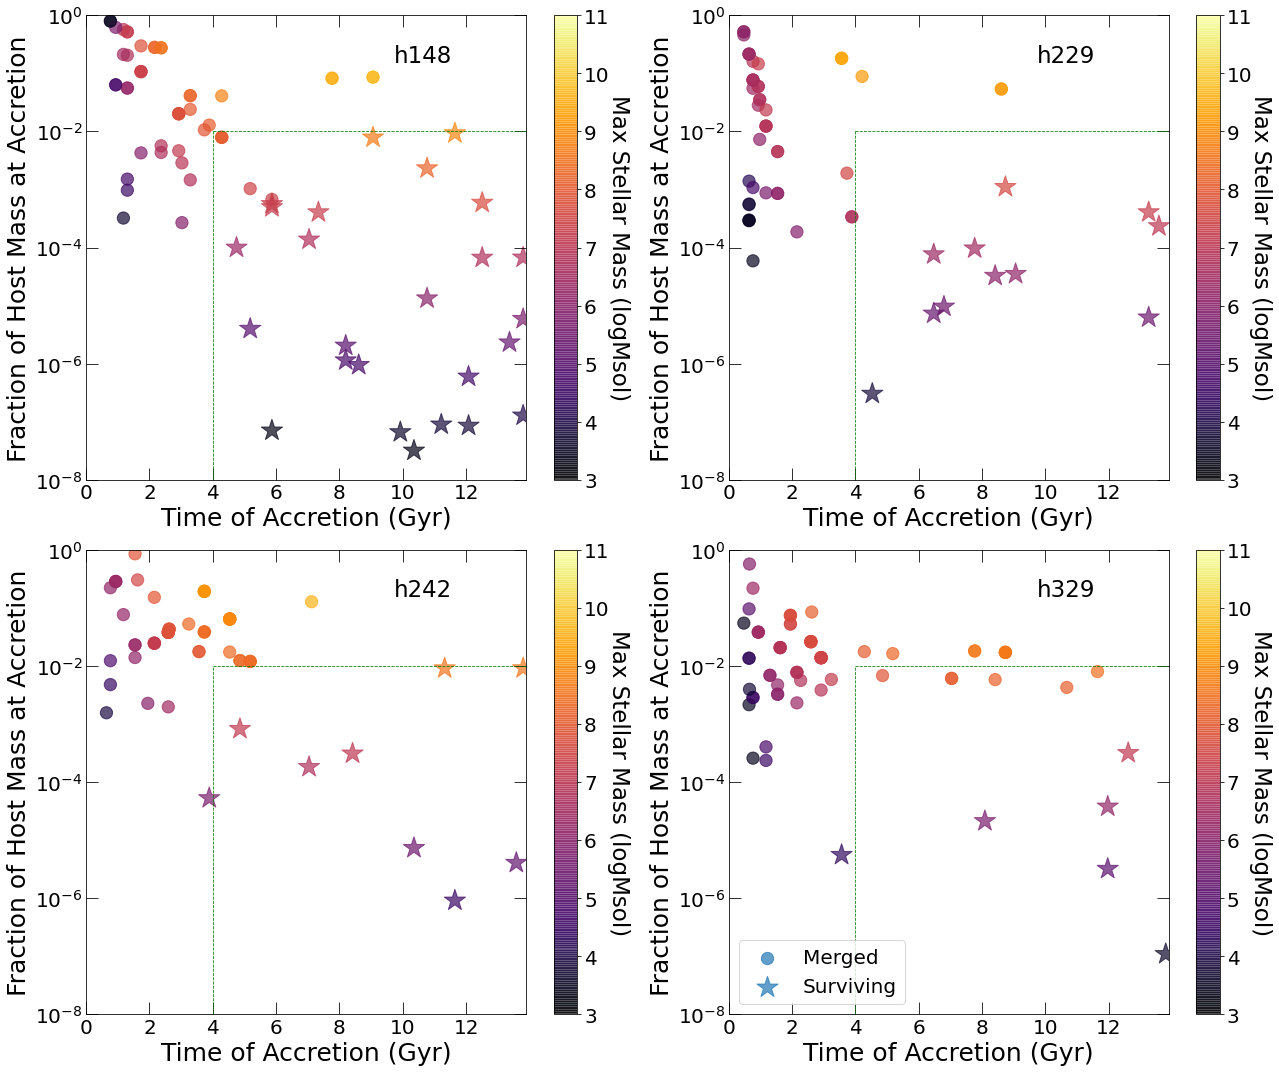

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='none', sharey='none', figsize=(18, 15))
fig.set_facecolor('w')
np.seterr(divide='ignore')

linx=np.linspace(1e-10, 14, 100)
cm = plt.cm.get_cmap('inferno')

x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h148_zombies:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax1.scatter(x, y, s=150, c=np.log10(z), alpha=0.7, label='Merged', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax1)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h148_survivors:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax1.scatter(x, y, s=500, c=np.log10(z), alpha=0.7, label='Surviving', marker='*', vmin=3, vmax=11, cmap=cm)
#ax1.legend(loc='best', fontsize=20, frameon=True)
ax1.plot(np.linspace(4, 14, 100), [1e-2]*100, ls='--', c='green', lw=0.8)
ax1.plot([4]*100, np.linspace(1e-10, 1e-2, 100),  ls='--', c='green', lw=0.8)
ax1.set_yscale('log')
ax1.text(0.7, 0.9, 'h148', transform=ax1.transAxes, fontsize=23)
ax1.set_ylim(1e-8, 1e0)
ax1.set_xlim(0, 13.9)
ax1.set_ylabel('Fraction of Host Mass at Accretion', fontsize=25)
ax1.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax1.tick_params(which='major', length=12)
ax1.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h229_zombies:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax2.scatter(x, y, s=150, c=np.log10(z), alpha=0.7, label='Merged', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax2)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h229_survivors:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax2.scatter(x, y, s=500, c=np.log10(z), alpha=0.7, label='Surviving', marker='*', vmin=3, vmax=11, cmap=cm)
#ax2.legend(loc='best', fontsize=20, frameon=True)
ax2.plot(np.linspace(4, 14, 100), [1e-2]*100, ls='--', c='green', lw=0.8)
ax2.plot([4]*100, np.linspace(1e-10, 1e-2, 100),  ls='--', c='green', lw=0.8)
ax2.set_yscale('log')
ax2.text(0.7, 0.9, 'h229', transform=ax2.transAxes, fontsize=23)
ax2.set_ylim(1e-8, 1e0)
ax2.set_xlim(0, 13.9)
ax2.set_ylabel('Fraction of Host Mass at Accretion', fontsize=25)
ax2.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax2.tick_params(which='major', length=12)
ax2.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h242_zombies:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax3.scatter(x, y, s=150, c=np.log10(z), alpha=0.7, label='Merged', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax3)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h242_survivors:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax3.scatter(x, y, s=500, c=np.log10(z), alpha=0.7, label='Surviving', marker='*', vmin=3, vmax=11, cmap=cm)
#ax3.legend(loc='best', fontsize=20, frameon=True)
ax3.plot(np.linspace(4, 14, 100), [1e-2]*100, ls='--', c='green', lw=0.8)
ax3.plot([4]*100, np.linspace(1e-10, 1e-2, 100),  ls='--', c='green', lw=0.8)
ax3.set_yscale('log')
ax3.text(0.7, 0.9, 'h242', transform=ax3.transAxes, fontsize=23)
ax3.set_ylim(1e-8, 1e0)
ax3.set_xlim(0, 13.9)
ax3.set_ylabel('Fraction of Host Mass at Accretion', fontsize=25)
ax3.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax3.tick_params(which='major', length=12)
ax3.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h329_zombies:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax4.scatter(x, y, s=150, c=np.log10(z), alpha=0.7, label='Merged', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax4)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h329_survivors:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax4.scatter(x, y, s=500, c=np.log10(z), alpha=0.7, label='Surviving', marker='*', vmin=3, vmax=11, cmap=cm)
ax4.legend(loc='lower left', fontsize=20, frameon=True)
ax4.plot(np.linspace(4, 14, 100), [1e-2]*100, ls='--', c='green', lw=0.8)
ax4.plot([4]*100, np.linspace(1e-10, 1e-2, 100),  ls='--', c='green', lw=0.8)
ax4.set_yscale('log')
ax4.text(0.7, 0.9, 'h329', transform=ax4.transAxes, fontsize=23)
ax4.set_ylim(1e-8, 1e0)
ax4.set_xlim(0, 13.9)
ax4.set_ylabel('Fraction of Host Mass at Accretion', fontsize=25)
ax4.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax4.tick_params(which='major', length=12)
ax4.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


fig.tight_layout()

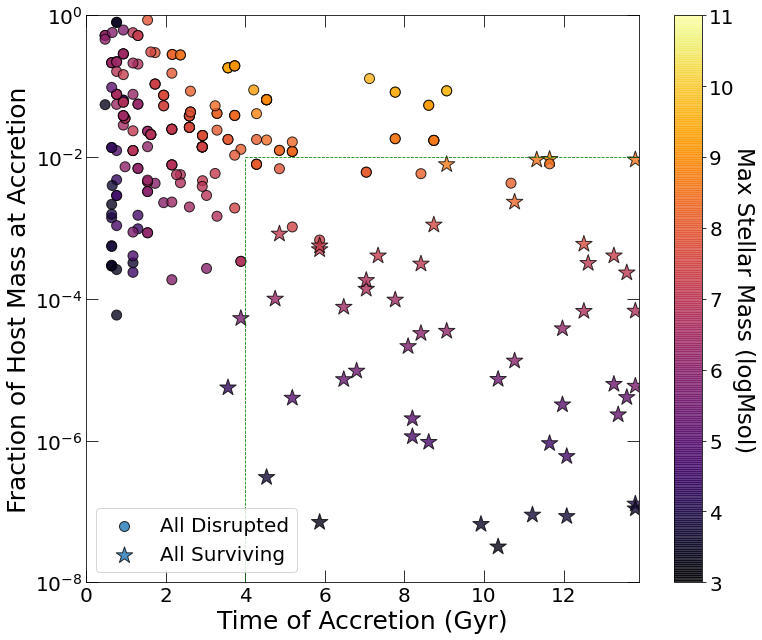

In [22]:
#concatenate for all 4 sims
fig, ax4 = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(11, 9))
fig.set_facecolor('w')
np.seterr(divide='ignore')

linx=np.linspace(1e-10, 14, 100)
cm = plt.cm.get_cmap('inferno')

x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h148_zombies:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax4.scatter(x, y, s=100, c=np.log10(z), alpha=0.8, edgecolor='k', vmin=3, vmax=11, cmap=cm)

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h148_survivors:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax4.scatter(x, y, s=300, c=np.log10(z), alpha=0.8, marker='*', edgecolor='k', vmin=3, vmax=11, cmap=cm)



x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h229_zombies:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax4.scatter(x, y, s=100, c=np.log10(z), alpha=0.8, edgecolor='k', vmin=3, vmax=11, cmap=cm)

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h229_survivors:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax4.scatter(x, y, s=300, c=np.log10(z), alpha=0.8, marker='*', edgecolor='k', vmin=3, vmax=11, cmap=cm)

x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h242_zombies:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax4.scatter(x, y, s=100, c=np.log10(z), alpha=0.8, edgecolor='k', vmin=3, vmax=11, cmap=cm)

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h242_survivors:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax4.scatter(x, y, s=300, c=np.log10(z), alpha=0.8, marker='*', edgecolor='k', vmin=3, vmax=11, cmap=cm)
#ax3.legend(loc='best', fontsize=20, frameon=True)


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h329_zombies:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i1 = ax4.scatter(x, y, s=100, c=np.log10(z), alpha=0.8, label='All Disrupted', edgecolor='k', vmin=3, vmax=11, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax4)
cbar1.set_label('Max Stellar Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h329_survivors:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0)[0]), axis = None)
i11 = ax4.scatter(x, y, s=300, c=np.log10(z), alpha=0.8, label='All Surviving', marker='*', edgecolor='k', vmin=3, vmax=11, cmap=cm)
ax4.legend(loc='lower left', fontsize=20, frameon=True)
ax4.plot(np.linspace(4, 14, 100), [1e-2]*100, ls='--', c='green', lw=0.8)
ax4.plot([4]*100, np.linspace(1e-10, 1e-2, 100),  ls='--', c='green', lw=0.8)
ax4.set_yscale('log')
#ax4.text(0.7, 0.9, 'h329', transform=ax4.transAxes, fontsize=23)
ax4.set_ylim(1e-8, 1e0)
ax4.set_xlim(0, 13.9)
ax4.set_ylabel('Fraction of Host Mass at Accretion', fontsize=25)
ax4.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax4.tick_params(which='major', length=12)
ax4.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


fig.tight_layout()

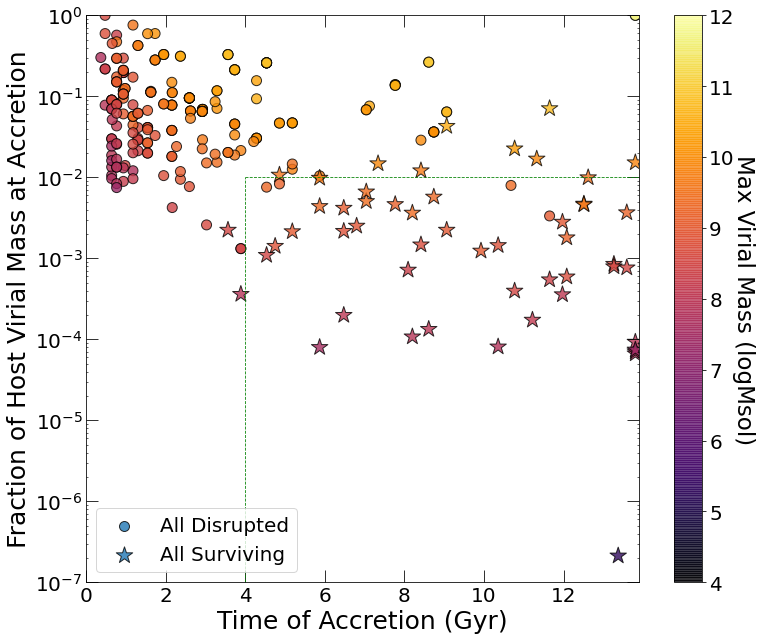

In [5]:
#concatenate for all 4 sims
fig, ax4 = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(11, 9))
fig.set_facecolor('w')
np.seterr(divide='ignore')

linx=np.linspace(1e-10, 14, 100)
cm = plt.cm.get_cmap('inferno')

x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h148_zombies:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[0]), axis = None)
i1 = ax4.scatter(x, y, s=100, c=np.log10(z), alpha=0.8, edgecolor='k', vmin=4, vmax=12, cmap=cm)

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h148_survivors:
    x = np.concatenate((x, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h148', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[0]), axis = None)
i11 = ax4.scatter(x, y, s=300, c=np.log10(z), alpha=0.8, marker='*', edgecolor='k', vmin=4, vmax=12, cmap=cm)



x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h229_zombies:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[0]), axis = None)
i1 = ax4.scatter(x, y, s=100, c=np.log10(z), alpha=0.8, edgecolor='k', vmin=4, vmax=12, cmap=cm)

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h229_survivors:
    x = np.concatenate((x, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h229', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[0]), axis = None)
i11 = ax4.scatter(x, y, s=300, c=np.log10(z), alpha=0.8, marker='*', edgecolor='k', vmin=4, vmax=12, cmap=cm)

x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h242_zombies:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[0]), axis = None)
i1 = ax4.scatter(x, y, s=100, c=np.log10(z), alpha=0.8, edgecolor='k', vmin=4, vmax=12, cmap=cm)

#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h242_survivors:
    x = np.concatenate((x, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h242', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[0]), axis = None)
i11 = ax4.scatter(x, y, s=300, c=np.log10(z), alpha=0.8, marker='*', edgecolor='k', vmin=4, vmax=12, cmap=cm)
#ax3.legend(loc='best', fontsize=20, frameon=True)


x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
#Zombies
for sat in h329_zombies:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Zombie', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[0]), axis = None)
i1 = ax4.scatter(x, y, s=100, c=np.log10(z), alpha=0.8, label='All Disrupted', edgecolor='k', vmin=4, vmax=12, cmap=cm)
cbar1 = fig.colorbar(i1, ax=ax4)
cbar1.set_label('Max Virial Mass (logMsol)', rotation=270, fontsize=23, labelpad=20)
cbar1.ax.tick_params(labelsize=20)
#Survivors
x = np.zeros(0)
y = np.zeros(0)
z = np.zeros(0)
for sat in h329_survivors:
    x = np.concatenate((x, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[1]), axis = None)
    y = np.concatenate((y, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[2]), axis = None)
    z = np.concatenate((z, accretion_time(simulation='h329', status='Survivor', tangos_halo=sat, halo_id=0, snap_num=0, category='dm')[0]), axis = None)
i11 = ax4.scatter(x, y, s=300, c=np.log10(z), alpha=0.8, label='All Surviving', marker='*', edgecolor='k', vmin=4, vmax=12, cmap=cm)
ax4.legend(loc='lower left', fontsize=20, frameon=True)
ax4.plot(np.linspace(4, 14, 100), [1e-2]*100, ls='--', c='green', lw=0.8)
ax4.plot([4]*100, np.linspace(1e-10, 1e-2, 100),  ls='--', c='green', lw=0.8)
ax4.set_yscale('log')
#ax4.text(0.7, 0.9, 'h329', transform=ax4.transAxes, fontsize=23)
ax4.set_ylim(1e-7, 1e0)
ax4.set_xlim(0, 13.9)
ax4.set_ylabel('Fraction of Host Virial Mass at Accretion', fontsize=25)
ax4.set_xlabel('Time of Accretion (Gyr)', fontsize=25)
ax4.tick_params(which='major', length=12)
ax4.tick_params(direction='in', which='both', labelsize=20, bottom=True, top=True, left=True, right=True)


fig.tight_layout()